In [9]:
!nvidia-smi

Fri May 16 21:18:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...  WDDM  |   00000000:07:00.0  On |                  N/A |
|  0%   39C    P8             18W /  285W |    1963MiB /  16376MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [11]:
import os
print("🧠 CPU 코어 수:", os.cpu_count())

🧠 CPU 코어 수: 12


In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch

config_path = "config.yaml"

# 랜덤 초기화 학습
results = model.train(
    data="config.yaml",
    epochs=100,
    imgsz=(1280, 720),     # ← 16:9 비율 유지
    batch=8,               # GPU VRAM에 맞게 조정
    device='cuda',         # 명시적으로 CUDA 사용
    workers=4
)

# 전이학습 
# results = model.train(
#     data=config_path,
#     epochs=100,
#     imgsz=(1280, 720),     # ← 16:9 비율 유지
#     batch=8,               # GPU VRAM에 맞게 조정
#     device='cuda',         # 명시적으로 CUDA 사용
#     workers=4,
#     pretrained=True,
#     # freeze=10
# )

# # 원재님 학습 파라미터 
# model.train(
#     data="/workspace/2025-05-21/data.yaml",  # 🔄 경로 수정
#     epochs=100,                               # 🧠 과적합 방지
#     imgsz=960,                               # 📐 대형 객체 대응
#     batch=128,                                # 💪 64GB 이상 VRAM 기준, 2GPU 활용
#     device="0,1",                            # 🔥 H200 2장
#     workers=32,                              # 🧵 96코어 CPU 활용
#     cache=True,                              # 🧠 RAM 773GB → full dataset 캐시
#     amp=True,                                # ⚡ fp16으로 속도 향상
#     name="drone_person_m960_b64_epoch_100",            # 🏷️ 실험명
#     project="/workspace/yolo",               # 📁 저장 경로
#     exist_ok=True                            # 덮어쓰기 허용
# )


New https://pypi.org/project/ultralytics/8.3.137 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=config.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=(1280, 720), save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\dat

train: WARNING  C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\data\images\train\6-FLY-AI06-SUN-3M-15-LAND-Pyeongtaek-1222-14-50-49-L-Y_0002999.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\USER\\OneDrive\\\\MyPythonStudy\\\\_\\acorn_project\\yolo_model\\data\\images\\train\\6-FLY-AI06-SUN-3M-15-LAND-Pyeongtaek-1222-14-50-49-L-Y_0002999.jpg'
train: WARNING  C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\data\images\train\6-FLY-AI07-SUN-5M-15-LAND-Asan-1222-11-49-33-L-N_0001466.jpg: ignoring corrupt image/label: cannot identify image file 'C:\\Users\\USER\\OneDrive\\\\MyPythonStudy\\\\_\\acorn_project\\yolo_model\\data\\images\\train\\6-FLY-AI07-SUN-5M-15-LAND-Asan-1222-11-49-33-L-N_0001466.jpg'



val: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\data\


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 4 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.96G      3.516      4.729      3.678         12       1280: 100%|██████████| 361/361 [01:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02

                   all        156       1641      0.213     0.0185     0.0101    0.00345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.22G      2.503      2.821      2.544          8       1280: 100%|██████████| 361/361 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.36     0.0185     0.0119    0.00386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.76G      2.109      2.169      2.158          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.544     0.0152     0.0199    0.00757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.15G      1.913      1.894      1.963          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.546     0.0286     0.0212    0.00665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.26G      1.784      1.683      1.833          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.561     0.0236     0.0258    0.00963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.12G      1.645       1.51      1.707          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.224     0.0496     0.0256     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.65G      1.574      1.402      1.637         18       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0857     0.0645     0.0449     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.01G      1.509      1.336      1.585          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0663     0.0795     0.0389     0.0137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.49G      1.447      1.237      1.534          3       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.208     0.0378     0.0291     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.14G      1.424       1.19      1.505         10       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0934     0.0563       0.05     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.73G      1.362      1.122      1.455          4       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0631     0.0381     0.0301      0.013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.15G      1.338      1.095      1.436         11       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.163     0.0892     0.0654     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       8.3G      1.312      1.042      1.416          5       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.26     0.0428     0.0465     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.41G      1.281      1.016      1.391         16       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.109     0.0726     0.0494     0.0228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.64G      1.275     0.9948      1.376          6       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0723     0.0712     0.0509     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.43G      1.228     0.9579      1.358          4       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.193     0.0484     0.0538     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.13G      1.226     0.9403      1.352         10       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.18      0.087      0.076     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.39G      1.195     0.9192      1.323         13       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0468     0.0555     0.0368      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.39G      1.176     0.8843      1.305         18       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0557     0.0845     0.0494     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.04G      1.158     0.8577      1.284         13       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0844     0.0979       0.05     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.21G       1.15     0.8493      1.281         13       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641     0.0539     0.0837     0.0453     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.45G       1.14     0.8467      1.275         19       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.159     0.0763     0.0599     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.44G      1.115     0.8151      1.253         12       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.228     0.0915     0.0936     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.77G      1.102     0.8061      1.243         13       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.151     0.0544     0.0616     0.0302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.26G      1.087     0.7914      1.236          4       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.155     0.0917     0.0754      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.72G      1.079     0.7763      1.225          6       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.248     0.0742     0.0858     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.98G      1.066     0.7586      1.216          7       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.289       0.06     0.0765     0.0325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.99G      1.057      0.762      1.217          5       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.198     0.0571     0.0641       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.74G      1.048     0.7399        1.2          1       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.243     0.0887      0.091     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.32G      1.045     0.7356      1.203          8       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.222      0.105     0.0927     0.0326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.27G      1.034     0.7253      1.195         25       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.16       0.09     0.0762     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       8.6G      1.027     0.7197      1.192         16       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.203     0.0824     0.0801     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.97G      1.011     0.7052      1.178         13       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.148     0.0656     0.0601     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.43G      1.001     0.7045      1.171          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.137     0.0662     0.0633     0.0317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       7.7G          1     0.7009      1.174          4       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.176     0.0853     0.0735     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.23G     0.9885     0.6838      1.161          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.104     0.0569     0.0573     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.88G      0.985     0.6793      1.157          3       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02

                   all        156       1641      0.209     0.0768     0.0857     0.0463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.01G     0.9761     0.6692      1.155          7       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.229     0.0836      0.082     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.73G     0.9755     0.6662      1.146         12       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.146     0.0894     0.0814     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.82G     0.9477     0.6436      1.132         37       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02

                   all        156       1641      0.182     0.0967     0.0849     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.19G     0.9415     0.6383      1.132          3       1280: 100%|██████████| 361/361 [01:38<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.24     0.0829     0.0908     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.37G     0.9481     0.6507      1.136         21       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.197     0.0733      0.084     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.44G     0.9425     0.6442      1.131          4       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.329     0.0741     0.0947     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.51G     0.9312     0.6265      1.129          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.229     0.0759      0.086     0.0407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.31G     0.9331     0.6289      1.126          4       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.279     0.0822     0.0903     0.0448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.02G     0.9181     0.6181      1.117          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.25     0.0904     0.0909     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.27G     0.9117     0.6051      1.106          9       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.245     0.0907     0.0975       0.04



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.83G     0.9131     0.6092      1.109         15       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.194     0.0742     0.0844     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.27G     0.9084     0.6091      1.104          8       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.171     0.0768     0.0798     0.0357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.19G     0.9046     0.5999      1.104         32       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.26     0.0808     0.0917     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.99G     0.8959     0.5964      1.101          6       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.284     0.0784     0.0878     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.02G     0.8905     0.5912      1.094         12       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.217     0.0908      0.085     0.0417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.85G     0.9023     0.5972      1.097         21       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.228     0.0969     0.0948     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.99G     0.8849      0.582      1.092          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.233     0.0816      0.087     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.05G     0.8705     0.5756      1.075          7       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.227      0.088     0.0959     0.0397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.46G     0.8702     0.5771      1.084          6       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.22     0.0862     0.0893     0.0335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.29G     0.8672     0.5726       1.08          0       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.246     0.0892      0.089     0.0419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.03G     0.8669      0.568      1.079          8       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.156     0.0848     0.0742     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.69G     0.8614     0.5586      1.072         14       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.257     0.0834      0.093      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.77G     0.8588     0.5572      1.075          6       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.232     0.0865     0.0945     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.99G     0.8381     0.5462      1.063          1       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.242     0.0875     0.0946     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.34G     0.8479     0.5539      1.069          9       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.194     0.0944     0.0928     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.08G     0.8379     0.5506      1.062          3       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.204     0.0996     0.0965     0.0385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.81G     0.8299     0.5364      1.055          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.255     0.0916     0.0992      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.62G     0.8241     0.5347      1.056         11       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.238     0.0979     0.0973     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       7.6G     0.8282     0.5345      1.062         13       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.239     0.0923     0.0978     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.99G     0.8286     0.5353      1.054          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.203     0.0878     0.0918     0.0374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.11G     0.8259     0.5308      1.052         24       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.268     0.0794     0.0901     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.16G      0.822     0.5287      1.053          4       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.249     0.0909     0.0942      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.59G     0.8129     0.5219      1.045         17       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.169     0.0918     0.0902     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.76G     0.8051     0.5142      1.045          3       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.217     0.0886     0.0927     0.0416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.98G     0.8064     0.5161       1.04          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.254     0.0852     0.0936     0.0425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.85G     0.8045     0.5226      1.043         14       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.185     0.0987     0.0907     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       7.7G      0.793     0.5093      1.033         15       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.243     0.0895      0.092     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.89G     0.7938      0.506      1.037          1       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.244       0.09     0.0899     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.94G     0.7892      0.503      1.032          2       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.204     0.0972     0.0966     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.26G     0.7881     0.5038      1.032          6       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.29      0.071     0.0859     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.09G     0.7781     0.4959      1.027         34       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.237     0.0822     0.0917     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.67G     0.7805     0.4989      1.028         14       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.209     0.0906      0.094     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.36G     0.7772     0.4946      1.029          4       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.217     0.0906     0.0918     0.0405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.99G     0.7797     0.4985      1.025          5       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.285     0.0694     0.0925     0.0383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.66G     0.7663     0.4921      1.024         14       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.171     0.0861     0.0881     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.91G     0.7612     0.4861       1.02          1       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.184     0.0847     0.0919     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.77G     0.7593     0.4835      1.016         12       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.188      0.092     0.0937      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.74G     0.7555     0.4792      1.016          8       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.166     0.0913     0.0808     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.97G     0.7449     0.4765      1.015          5       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.208     0.0862     0.0917     0.0382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.73G     0.7458     0.4726      1.014         48       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.292     0.0827     0.0938     0.0421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       9.1G     0.7409      0.471      1.009         39       1280: 100%|██████████| 361/361 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.32       0.08     0.0948     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.07G     0.7434     0.4689       1.01         43       1280: 100%|██████████| 361/361 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.278     0.0804      0.093     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.32G     0.7427     0.4681      1.006         24       1280: 100%|██████████| 361/361 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.19     0.0913     0.0921     0.0434


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.33G     0.7466     0.4426     0.9839          4       1280: 100%|██████████| 361/361 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.235     0.0793     0.0912      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.56G     0.7336     0.4385     0.9827          8       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.172     0.0899      0.094     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.54G     0.7293     0.4347     0.9789          7       1280: 100%|██████████| 361/361 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.201     0.0822     0.0948     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.58G     0.7271     0.4333     0.9784         11       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.245     0.0774     0.0931      0.042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.57G     0.7197     0.4249     0.9699          1       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.212     0.0825     0.0931     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.61G     0.7155     0.4272     0.9701         10       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.219      0.092     0.0957     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.53G     0.7111     0.4231     0.9703          4       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641        0.2     0.0953     0.0971     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.67G     0.7015     0.4203     0.9688          1       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.207     0.0945     0.0974      0.044



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.54G     0.7023     0.4157     0.9624          5       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641      0.227     0.0902     0.0976     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.33G     0.7004     0.4159     0.9668          4       1280: 100%|██████████| 361/361 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01

                   all        156       1641       0.22     0.0869     0.0959      0.041



100 epochs completed in 2.395 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.6MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.6MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLOv8s summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02


                   all        156       1641       0.24     0.0829     0.0909     0.0493
             structure        156        186    0.00462     0.0108    0.00355    0.00143
                person        138        736          0          0     0.0215    0.00974
                  tree         96        243     0.0392    0.00412     0.0378      0.019
               vehicle         65         99      0.587      0.283      0.275      0.144
              building         97        367          0          0     0.0106    0.00355
                bridge         10         10      0.807        0.2      0.197      0.118
Speed: 0.3ms preprocess, 6.3ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs\detect\train


In [3]:
# 검증
metrics = model.val()
print("mAP50-95:", metrics.box.map)

Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLOv8s summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\data\
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03


                   all        156       1641       0.24      0.083     0.0908     0.0494
             structure        156        186    0.00465     0.0108    0.00355    0.00145
                person        138        736          0          0     0.0213    0.00972
                  tree         96        243     0.0391    0.00412     0.0375     0.0189
               vehicle         65         99      0.587      0.283      0.275      0.145
              building         97        367   8.85e-05   2.75e-05     0.0103    0.00372
                bridge         10         10      0.808        0.2      0.197      0.118
Speed: 0.7ms preprocess, 12.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train2
mAP50-95: 0.04940287457775894


In [19]:
# 추론
results = model.predict(source="sample4.jpg", save=True)
results[0].show()   # 주피터에 시각화


image 1/1 C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\sample4.jpg: 736x1280 (no detections), 125.5ms
Speed: 11.0ms preprocess, 125.5ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs\detect\train6


### YOLOv8 파라미터 요약
  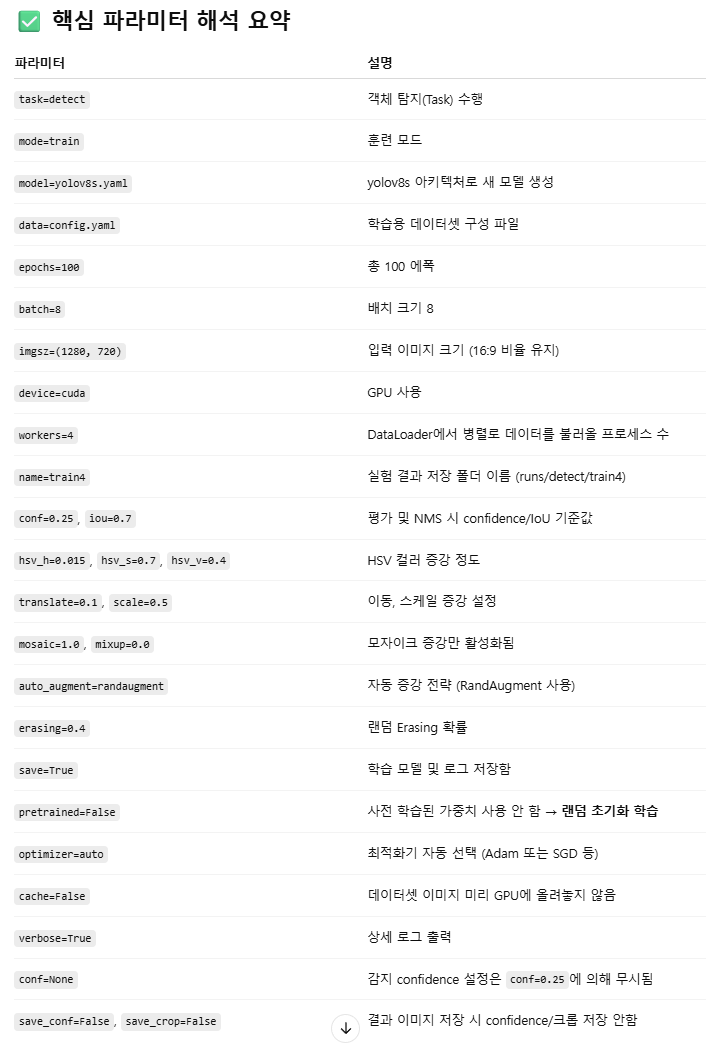
  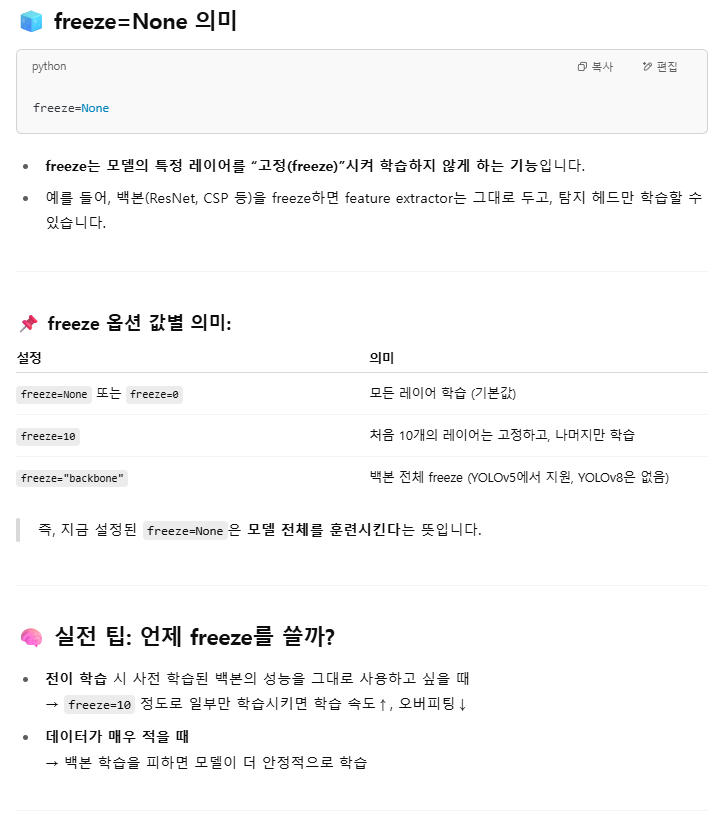
  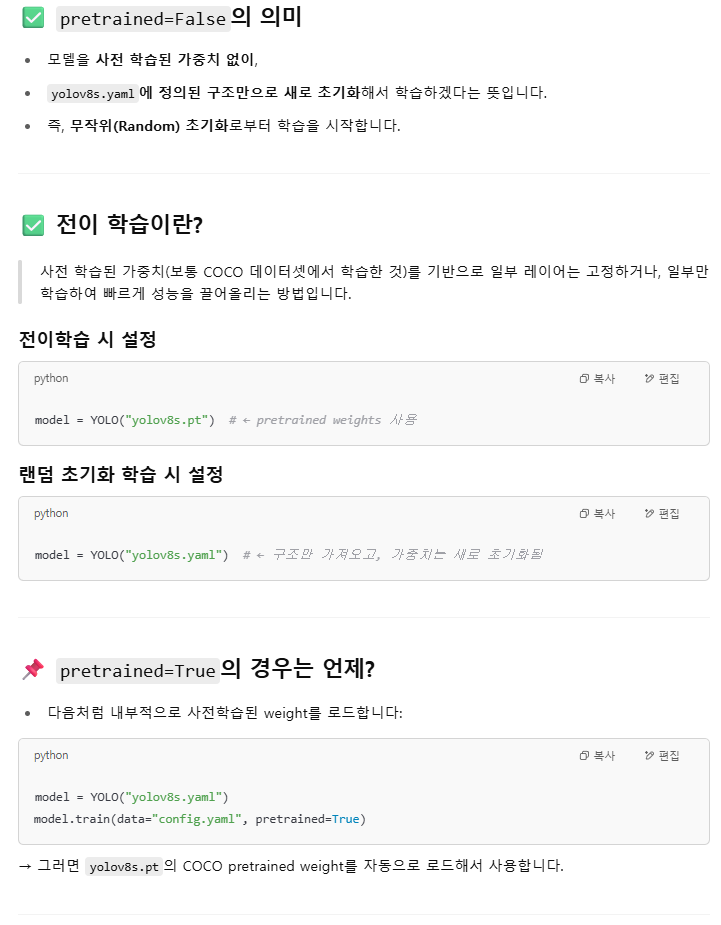

* 학습된 가중치 가져와서 추가 학습시키기 

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov11m_myeong_best.pt")  # build a new model from scratch

config_path = "airsim_dataset_config.yaml"

# 랜덤 초기화 학습
results = model.train(
    data=config_path,
    epochs=200,
    imgsz=640,    
    batch=8,               # GPU VRAM에 맞게 조정
    device='cuda',         # 명시적으로 CUDA 사용
    pretrained=True,
    freeze=10
)

New https://pypi.org/project/ultralytics/8.3.156 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
engine\trainer: task=detect, mode=train, model=yolov11m_myeong_best.pt, data=airsim_dataset_config.yaml, epochs=200, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\원

train: New cache created: C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\airsim\yolov11_dataset_airsim\labels\train.cache



val: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\원본

val: New cache created: C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\airsim\yolov11_dataset_airsim\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000114, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.29G      1.952      8.623      1.523          6        640: 100%|██████████| 13/13 [00:02<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.646     0.0333     0.0478     0.0226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.36G      1.969      7.787      1.557          8        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33     0.0828     0.0667     0.0591     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       2.2G      1.685      6.414       1.36          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.647     0.0333     0.0535     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.21G        1.7      5.836      1.323         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33     0.0621      0.226     0.0999     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.36G      1.544      4.654      1.221          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.29      0.156      0.167      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.19G      1.402      4.222      1.178         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.513      0.183      0.244       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.21G      1.433      3.736      1.168         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.427       0.23       0.28      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       2.2G      1.345       4.11      1.143         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.51       0.23        0.3      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.21G      1.218      3.686      1.076          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.496      0.293      0.328      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.21G      1.122      3.267      1.014         15        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.49      0.304       0.33      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       2.2G      1.107      3.339      1.047         13        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.437      0.315      0.339      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.19G      1.123      3.397      1.021          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.479      0.311      0.345      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.21G      1.112      3.174      1.031         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.475      0.296      0.354      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.35G      1.063      3.392     0.9991          9        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.493      0.296      0.375      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       2.2G      1.031      3.019     0.9902         14        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.538      0.296      0.389      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       2.2G       1.08       2.99     0.9651         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.545      0.296       0.39      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.21G       1.04      3.113     0.9766         17        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.575      0.286      0.396      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200       2.2G      1.014      2.834     0.9766         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.569      0.293      0.403      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       2.2G     0.9648      2.741     0.9593          4        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.575      0.287      0.405      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.35G     0.9556      2.659     0.9496          4        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.563       0.29      0.409       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.36G      1.051      2.796     0.9931         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.569      0.289      0.409      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       2.2G     0.9545      2.587     0.9699          3        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.511        0.3      0.414      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.24G     0.9634      2.341      0.951         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.53      0.311      0.419      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.35G     0.9095      2.249      0.935         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.52      0.333      0.419      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.23G     0.9193      2.114     0.9048          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.578      0.315      0.425      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.21G     0.9215      1.996     0.9223          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.646       0.31      0.427      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.24G     0.9334      2.124     0.9487          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.619      0.315      0.432      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       2.2G     0.9175      1.698     0.9283          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.977      0.315      0.717      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.35G     0.9065      1.593     0.9253         13        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.984      0.315      0.741      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.22G     0.9209      1.702      0.933          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.97       0.33      0.743      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.21G     0.8615      1.406     0.9422         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.96       0.33      0.734      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.35G     0.9356      1.381     0.9164         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.957       0.33      0.752      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.21G     0.8567      1.394     0.9179         13        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.974      0.323       0.76      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.21G     0.9259      1.161     0.9146         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33        0.6      0.576       0.76      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.36G     0.9742      1.156     0.9463         13        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.654      0.719      0.763      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.35G     0.9602     0.9895     0.9189         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.785      0.677       0.77      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.36G      0.933     0.9644     0.9057         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.931      0.596      0.773      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.23G     0.8261      0.761     0.9074          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.837      0.668      0.774      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.23G     0.8524     0.8495     0.9031         15        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.954      0.581      0.784      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.32G     0.8782     0.8185     0.9132          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.945      0.581      0.779      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200       2.2G     0.8488     0.7316     0.8814         14        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.837       0.69      0.792      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.36G     0.7935     0.7168     0.8731         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.867      0.656      0.798      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.36G     0.8316      0.696     0.8928          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.894      0.656      0.798      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.19G     0.7715     0.6223     0.8708         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.815      0.712        0.8      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.21G     0.8803     0.7097      0.927          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33        0.8      0.722      0.809      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.24G     0.7924     0.6257     0.8926          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.83      0.722       0.81      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.21G     0.8834     0.6714     0.9314         16        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.843      0.718      0.814      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       2.2G     0.8017     0.6097     0.8648         16        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.847      0.718      0.816      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200       2.2G     0.7846      0.626     0.8899          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.871      0.704      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.21G     0.7705     0.6005     0.8703          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.851      0.719      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.24G     0.7898     0.6052     0.8993         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.844      0.725       0.84      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.34G      0.853      0.627     0.9033         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.853      0.716      0.853      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.21G     0.8288     0.6327     0.9008          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.824      0.733      0.855       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.19G     0.8487     0.6316     0.9078          3        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.831      0.762       0.86      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.21G     0.7502     0.5465      0.878         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.834      0.762      0.857      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.33G     0.7942     0.5536     0.8968         15        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.802       0.77      0.856      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.36G     0.7959      0.559     0.8604         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.807      0.772      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.21G     0.7285     0.5326        0.9          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.81      0.772      0.862      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.21G     0.7703     0.5596     0.8589         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.811      0.769      0.864      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.22G      0.798     0.5382     0.8756         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.812      0.766      0.862        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.21G     0.7372     0.5111     0.8856         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.765      0.862      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.22G     0.7206     0.5127     0.8592          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.841      0.732      0.863      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.21G     0.7191     0.5717      0.871         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.887      0.709      0.863      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.35G     0.7103     0.5004     0.8523          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.809      0.769      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.21G     0.7604     0.5344     0.8711         16        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.895      0.711      0.863      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.21G     0.6828     0.5004     0.8564         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.902      0.711      0.846      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       2.2G     0.7364     0.5561     0.8627         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909       0.71      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       2.2G     0.7503     0.5187     0.8569          9        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.914      0.709      0.865      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.21G     0.7214     0.4824     0.8776          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.908      0.709      0.861      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.21G     0.7309     0.5153     0.8773          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.912      0.709      0.867      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.35G     0.7583     0.5206     0.8789         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.802      0.872      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.33G       0.69     0.4688     0.8741         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.801      0.873       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.21G     0.7635     0.5114     0.8591         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33        0.8      0.798      0.871       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.36G      0.724     0.4925     0.8701         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.808        0.8      0.871      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.35G      0.722     0.4882     0.8859          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.814      0.803      0.874      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.34G     0.7538     0.5047     0.8739         11        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.812      0.796      0.877      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.21G     0.6986      0.485     0.8746          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.808      0.795      0.876      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       2.2G     0.7741     0.5426     0.8798          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.91      0.709      0.873      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.36G     0.7457     0.4643     0.8705         19        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.905      0.715      0.874      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200       2.2G     0.6833     0.4478     0.8468          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.717      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.21G     0.6766     0.4691     0.8668          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909       0.72      0.873      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.36G     0.6495     0.4505     0.8515          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.908      0.719      0.874      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.21G     0.6468     0.4381     0.8723          6        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.908      0.716      0.875      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       2.2G     0.6678     0.4298     0.8553          4        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.758      0.815      0.875       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.24G     0.6801     0.4568     0.8441         13        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.759      0.833      0.874      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.21G     0.6789     0.4111     0.8446          9        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.761      0.844      0.878      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.19G     0.6638     0.4446     0.8341         13        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.761       0.84      0.875      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       2.2G     0.6532     0.4029     0.8674          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.74      0.803      0.868      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       2.2G     0.6683     0.4375     0.8461         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.749      0.801      0.873      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.21G     0.6508     0.4798      0.836         20        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.752      0.801      0.874       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.21G      0.648     0.4686      0.842         16        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.762      0.801      0.874      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.19G     0.6793     0.4512     0.8515         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.817      0.783      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.24G     0.6594     0.4478     0.8608          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.84       0.76      0.881      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.36G     0.6573      0.492     0.8232         18        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.915      0.751      0.885      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.21G     0.7215     0.5198     0.8437         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.917      0.763      0.888      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.33G     0.6275     0.4325     0.8505          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.915      0.763      0.887      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.36G     0.6217     0.4024      0.839         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.762      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.24G     0.6966     0.4313      0.854          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.757      0.886      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       2.2G     0.6167      0.434     0.8281          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.746      0.888      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.19G     0.6861     0.4661     0.8602          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.743      0.891      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       2.2G     0.6422     0.4215     0.8658          2        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.905      0.741       0.88      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.21G     0.6674     0.4543     0.8542          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.891      0.761      0.884      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       2.2G     0.7052     0.4587     0.8622          4        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.921      0.708      0.877      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       2.2G     0.6735      0.469     0.8538         15        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.846      0.769      0.878      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       2.2G     0.6085      0.417     0.8373          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.85       0.77      0.879      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.21G      0.605      0.402     0.8292          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.851      0.769      0.879      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.23G      0.614     0.3973     0.8195          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.832      0.777      0.881      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.19G     0.7199     0.4516     0.8533         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.832      0.783      0.882      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       2.2G     0.6334     0.4405     0.8441         29        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.834      0.804      0.885       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.23G     0.6067     0.4187      0.838         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.836      0.807      0.885      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.21G     0.6293     0.4058     0.8609          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.83      0.804      0.884      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.23G     0.7155     0.5054     0.8836          4        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.834       0.78      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       2.2G     0.6391     0.4375     0.8448         17        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.911       0.75      0.877      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       2.2G     0.7081     0.4243     0.8476          5        640: 100%|██████████| 13/13 [00:01<00:00,  6.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.881      0.753      0.877      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.21G     0.6232     0.4103     0.8475          7        640: 100%|██████████| 13/13 [00:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.866      0.743      0.869      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.19G     0.6661      0.422     0.8508         10        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.904      0.747      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200       2.2G     0.6538     0.4178     0.8452          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.904      0.748      0.884      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.22G     0.6179     0.4048     0.8237          7        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.905      0.748      0.894      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.21G     0.6295     0.4035     0.8394         10        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.748      0.875      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.32G     0.6155     0.4003     0.8354         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.748      0.887      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.21G     0.6777     0.4618      0.854          6        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.916      0.748      0.892      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.36G      0.683     0.4375     0.8471          9        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.912      0.746      0.891      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200       2.2G     0.5996     0.3919     0.8221         13        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.919      0.747      0.885      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.34G     0.6323     0.4243     0.8358         13        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.92      0.745       0.89        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.36G      0.641     0.3962     0.8542         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.919      0.747      0.885      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       2.2G     0.6043     0.4166     0.8468         11        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.916      0.741       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       2.2G     0.6345     0.4124     0.8366         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.92      0.739      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200       2.2G     0.6908     0.4278     0.8595          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.92      0.738       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.21G     0.6204     0.3943     0.8418         11        640: 100%|██████████| 13/13 [00:01<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.925      0.734      0.874      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200       2.2G     0.6214     0.4028     0.8332         13        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.922      0.737      0.872      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.36G     0.6249     0.3916     0.8573          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.922      0.735      0.873      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.19G     0.5836     0.3862     0.8402          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.923      0.734      0.873      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.37G     0.5892     0.3811     0.8245          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.924      0.735      0.877      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.21G     0.6746     0.4267      0.845         18        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.919      0.739       0.88      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200       2.2G     0.6679     0.4611     0.8571         14        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.914      0.743      0.882       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.23G     0.6264     0.3978     0.8504          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.748      0.894      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200       2.2G      0.629     0.4382     0.8461          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906       0.75      0.888      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       2.2G     0.6544     0.3879     0.8469         15        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.911       0.75      0.902      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       2.2G      0.611     0.3807     0.8326         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.911      0.751        0.9      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200       2.2G     0.6065      0.408      0.831          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.914      0.752      0.898      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.21G     0.5938     0.3917     0.8369         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.915      0.753      0.898      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200       2.2G     0.6311     0.4359       0.83          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.913      0.753      0.896      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.21G     0.5786     0.3796     0.8497          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909      0.752      0.881      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.32G     0.5855     0.3815     0.8438          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.908      0.751      0.894      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.36G     0.6367     0.4209     0.8551          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.905       0.75      0.895      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.21G     0.6347     0.3961     0.8483         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906       0.75      0.895      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200       2.2G     0.5503     0.3757     0.8162          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906       0.75      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.35G     0.6388     0.4334      0.826         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.904       0.75      0.878      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       2.2G     0.6354     0.4001      0.841         17        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.904      0.749      0.877      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200       2.2G     0.6345     0.4222      0.843         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.899      0.749      0.879      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       2.2G     0.5867     0.3658     0.8423         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.92      0.734      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.35G     0.5971     0.4062     0.8358         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.923      0.735      0.878      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       2.2G     0.6028     0.4065     0.8538         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.923      0.735      0.876      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       2.2G     0.6109     0.4036     0.8489          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.905       0.75      0.879       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       2.2G     0.6059     0.4127     0.8397         10        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906       0.75      0.879      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.19G      0.583     0.3705     0.8296         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.751      0.876      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.21G     0.6112     0.4287     0.8487          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909      0.751      0.879      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.21G     0.5971     0.3994     0.8259          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.91      0.752      0.878      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200       2.2G     0.6421     0.4177     0.8351          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909      0.751      0.879      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200       2.2G      0.636     0.4087     0.8393          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.91      0.751      0.881      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.38G     0.6184     0.3639     0.8326          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.91       0.75      0.878      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.23G     0.6184     0.4327     0.8457          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.908       0.75      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200       2.2G     0.5824     0.3738     0.8369          6        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.749      0.878      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.35G     0.6501     0.4181     0.8053          4        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.902      0.749       0.88      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       2.2G     0.6168     0.4188     0.8415         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.901      0.749      0.895      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.23G       0.64     0.4277     0.8367          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.928      0.732      0.881       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.36G     0.5514     0.3823     0.8105          6        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.93      0.732      0.861      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.21G      0.573     0.3956     0.8196         16        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.902      0.748      0.864      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.22G     0.5912     0.3826     0.8409         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.915      0.739      0.863      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200       2.2G     0.5616     0.3459     0.8348          7        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.899      0.747       0.86      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.21G     0.5809     0.3821     0.8352          8        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.928      0.735      0.862      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       2.2G     0.5807     0.3942     0.8404         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.932      0.732      0.864      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.24G     0.6129     0.3936     0.8234         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.935      0.732      0.859      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.21G       0.56      0.408     0.8255         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.938      0.729      0.878      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       2.2G     0.5359      0.369     0.8369          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.911      0.749      0.878       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.32G     0.6068     0.4088     0.8503         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.91      0.749       0.88       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.22G      0.614     0.4053     0.8474          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.917      0.741      0.874      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       2.2G     0.5701      0.371     0.8287          4        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.748      0.874      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.21G     0.5773      0.372      0.799         13        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.919      0.742      0.873      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.19G     0.6009     0.3585     0.8205          6        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.749      0.877      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.24G     0.6116     0.3772     0.8254         10        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.907      0.749      0.875      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.36G     0.5808     0.3842     0.8606          2        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.909      0.748      0.865      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.36G     0.6064     0.3646      0.813          5        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.915       0.74      0.864      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       2.2G     0.5932     0.3734     0.8159         14        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.904      0.748      0.877      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.19G     0.5696     0.3582     0.8201         12        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.921      0.737      0.876      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.23G     0.5716      0.373     0.8303         12        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.918       0.74      0.876       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.23G     0.5656     0.3686     0.8382         21        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.906      0.748      0.872      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.23G     0.6297     0.3875     0.8286         11        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.925      0.734      0.876       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       2.2G     0.6077     0.4187     0.8157          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.921      0.735      0.871      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200       2.2G     0.5594     0.3556     0.8153          3        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.923      0.734      0.882      0.608


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.18G     0.5531     0.3386     0.8293          5        640: 100%|██████████| 13/13 [00:01<00:00,  7.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.834      0.776      0.864      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.32G     0.6113     0.3763     0.8672          9        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.812      0.789      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.19G     0.5867     0.3621     0.8304          7        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33       0.82        0.8      0.864      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       2.2G     0.5921      0.354     0.8269          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.806      0.866      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200       2.2G     0.5901     0.3496     0.8358          4        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.811      0.805      0.865      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.19G     0.6036     0.3576     0.8529          4        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.805      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       2.2G     0.5982     0.3341      0.853          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.809      0.806      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.19G     0.5424     0.3423     0.8337          6        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.813      0.802      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.19G     0.6016     0.3715     0.8234          8        640: 100%|██████████| 13/13 [00:01<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.815      0.803      0.869      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.19G     0.6248     0.3627     0.8357          5        640: 100%|██████████| 13/13 [00:01<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         26         33      0.812      0.802      0.867      0.598



200 epochs completed in 0.135 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 40.7MB
Optimizer stripped from runs\detect\train\weights\best.pt, 40.7MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLO11m summary (fused): 303 layers, 20,094,796 parameters, 0 gradients, 68.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         26         33      0.911      0.751        0.9      0.621
                person          9         10          1      0.587      0.799      0.382
                   car         18         18      0.977      0.667      0.905      0.632
                 truck          5          5      0.755          1      0.995      0.849
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


In [9]:
# 검증
metrics = model.val()
print("mAP50-95:", metrics.box.map)

Ultralytics 8.3.68  Python-3.8.20 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 16376MiB)
YOLO11m summary (fused): 303 layers, 20,094,796 parameters, 0 gradients, 68.0 GFLOPs


val: Scanning C:\Users\USER\OneDrive\문서\MyPythonStudy\패스트캠퍼스\파이토치_컴퓨터비전\acorn_project\yolo_model\원본
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<0


                   all         26         33       0.91      0.751        0.9      0.611
                person          9         10          1      0.587      0.798      0.382
                   car         18         18      0.976      0.667      0.905      0.633
                 truck          5          5      0.754          1      0.995      0.819
Speed: 1.6ms preprocess, 17.5ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs\detect\train2
mAP50-95: 0.6111606381399247


In [24]:
# 추론
results = model.predict(source="sample4.jpg", save=True)
results[0].show()   # 주피터에 시각화


image 1/1 C:\Users\USER\OneDrive\\MyPythonStudy\\_\acorn_project\yolo_model\sample4.jpg: 736x1280 2 structures, 91.0ms
Speed: 8.0ms preprocess, 91.0ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs\detect\train6


* 학습된 가중치 가져와서 이미지 탐지 성능 확인해보기 

In [11]:
from ultralytics import YOLO

# Load a model
model = YOLO("last.pt")  # build a new model from scratch

# 추론
results = model.predict(source="sample4.jpg", save=True)
results[0].show()   # 주피터에 시각화


image 1/1 D:\mypython_study\_\acorn_project\yolo_model\sample4.jpg: 544x960 1 person, 1440.6ms
Speed: 331.8ms preprocess, 1440.6ms inference, 98.2ms postprocess per image at shape (1, 3, 544, 960)
Results saved to runs\detect\predict6


In [62]:
print(results[0].boxes.data)

tensor([[1.6952e+03, 1.4106e+03, 1.7617e+03, 1.5768e+03, 8.1176e-01, 1.0000e+00],
        [2.6200e+02, 1.5913e+03, 7.0905e+02, 1.8741e+03, 4.0117e-01, 3.0000e+00],
        [9.1724e+00, 6.2880e+02, 1.1496e+03, 1.5291e+03, 3.9944e-01, 3.0000e+00]])
